## Data import and treatment

In [1]:
import pandas as pd
import numpy as np

In [2]:

# Chargement des données des prénoms
df_prenoms = pd.read_csv('/Users/anthonyivanier/Desktop/Ensae/3A/NLP/firstname_with_sex.csv', sep=';')

# Chargement des transcriptions
df_transcriptions = pd.read_csv('/Users/anthonyivanier/Desktop/Ensae/3A/NLP/transcriptions_with_sex.csv')


In [3]:
df_prenoms.head(27)


,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951
5,joseph,897742,4246
6,anne,1479,816241
7,marguerite,1441,813859
8,catherine,1223,792448
9,louis,750498,2720


In [4]:
df_prenoms_with_space_or_hyphen = df_prenoms[df_prenoms['firstname'].str.contains(' |-', regex=True)]
print(df_prenoms_with_space_or_hyphen['firstname'])


Series([], Name: firstname, dtype: object)


In [5]:
print(df_prenoms.shape , df_transcriptions.shape)

(6946, 3) (241, 4)


In [6]:
df_transcriptions.head()


,subject_line,groundtruth,prediction,sex
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: ...,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupa...,nom: Lhopital prénom: Louis Jean date_naissanc...,homme
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: id...,nom: Pyrin prénom: Marie date_naissance: 55 re...,femme
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme ...,nom: Lavocat prénom: Marie date_naissance: 187...,femme
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: ...,femme


In [7]:

# Set the display option to print the entire line
pd.set_option('display.max_colwidth', None)

df_transcriptions.iloc[0,:]


subject_line                                       ebb26ada-044c-4c62-9dbc-a9c8d505d31c
groundtruth     surname: Chardon firstname: Marie occupation: idem link: fille age: 30 
prediction            nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: " 
sex                                                                               femme
Name: 0, dtype: object

In [8]:
# Probalité des sexes des prénoms
df_prenoms['total'] = df_prenoms['male'] + df_prenoms['female']
df_prenoms['gender_probability'] = df_prenoms['female'] / df_prenoms['total']

Let's exctract first_name

In [9]:
'''def extract_firstname(text):
    # Extraction du prénom à partir de la colonne groundtruth ou prediction
    parts = text.split()
    for i, part in enumerate(parts):
        if part in ["firstname:", "prénom:"]:
            return parts[i+1]  # Retourne le prénom qui suit ces indicateurs
    return None
    '''

def extract_firstname(text):
    # Extraction du prénom à partir de la colonne groundtruth ou prediction
    parts = text.split()
    for i, part in enumerate(parts):
        if part in ["firstname:", "prénom:"]:
            firstname = parts[i+1]  
            
            
            if i+2 < len(parts) and parts[i+2].isalpha():
                firstname += " " + parts[i+2]
            
            return firstname
    return None


df_transcriptions['extracted_firstname_gt'] = df_transcriptions['groundtruth'].apply(extract_firstname)
df_transcriptions['extracted_firstname_gt'] = df_transcriptions['extracted_firstname_gt'].str.lower()

#
df_transcriptions['extracted_firstname_pred'] = df_transcriptions['prediction'].apply(extract_firstname)  
df_transcriptions['extracted_firstname_pred'] = df_transcriptions['extracted_firstname_pred'].str.lower()

# Column 'sex' en binaire
df_transcriptions['sex_binary'] = df_transcriptions['sex'].map({'femme': 1, 'homme': 0, 'ambigu': float('nan')})


In [10]:

for i in range(len(df_transcriptions)):
    if df_transcriptions['extracted_firstname_gt'].iloc[i] != df_transcriptions['extracted_firstname_pred'].iloc[i]:
        print(df_transcriptions['extracted_firstname_gt'].iloc[i], df_transcriptions['extracted_firstname_pred'].iloc[i])


louis-jean louis jean
antoine angène
alexandre herandre
marguerite oarguerite
virginie vigmie
eugènie eugénie
josèphine joséphine
anroine antoine
justine gustine
clément clement
antoine angloise
françois feris
eugènie eugénie
jacques jregues
claude vaude
jean-marie jean marie
gilbert gilbeuse
branislav branistau
stanislas mamiolas
None eugéne
madeleine gadeleine
etiennette ctiennette
antoine aupène
claude clause
gilbert gilbeup
pierre anne
marthe marthy
alix alice
françoise faul
françois antoine zean antoine
antonie entonie
jean-baptiste jean-haptiste
jean-claude jean blanse
victor vicher
madeleine mareleine
jean raymond jean-raymond
france franco
blaise clause
baptiste bt
simon simone
marie-louise marie s
madeleine vadeleine
théodore théodote
barthélémy barthe
françois ferd
pétronille gihromille


In [11]:
df_transcriptions.head(3)

,subject_line,groundtruth,prediction,sex,extracted_firstname_gt,extracted_firstname_pred,sex_binary
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: idem link: fille age: 30,"nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: """,femme,marie,marie,1.0
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67,nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef,homme,louis-jean,louis jean,0.0
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: idem link: idem employer: idem age: 15,nom: Pyrin prénom: Marie date_naissance: 55 relation: d,femme,marie,marie,1.0


Let's exctract other data

In [12]:
def extract_occupation(text):
    parts = text.split()
    for i, part in enumerate(parts):
        if part == "occupation:":
            return parts[i+1]
    return None

def extract_link(text):
    parts = text.split()
    for i, part in enumerate(parts):
        if part == "link:":
            return parts[i+1]
    return None

def extract_profession(text):
    parts = text.split()
    for i, part in enumerate(parts):
        if part == "profession:":
            return parts[i+1]
    return None

def extract_relation(text):
    parts = text.split()
    for i, part in enumerate(parts):
        if part == "relation:":
            return parts[i+1]
    return None



In [13]:
# Merge based on extracted firstname
df_combined = pd.merge(df_transcriptions,
                       df_prenoms[['firstname', 'gender_probability']],
                       left_on='extracted_firstname_gt',
                       right_on='firstname',
                       how='left')


df_combined_pred = pd.merge(df_transcriptions,
                       df_prenoms[['firstname', 'gender_probability']],
                       left_on='extracted_firstname_pred',  # using predicted instead of groundtruth
                       right_on='firstname',
                       how='left')

In [14]:
df_transcriptions['occupation'] = df_combined['groundtruth'].apply(extract_occupation)
df_transcriptions['link'] = df_combined['groundtruth'].apply(extract_link)
df_transcriptions['profession'] = df_combined_pred['prediction'].apply(extract_profession)
df_transcriptions['relation'] = df_combined_pred['prediction'].apply(extract_relation)

In [15]:
df_combined['occupation'] = df_combined['groundtruth'].apply(extract_occupation)
df_combined['link'] = df_combined['groundtruth'].apply(extract_link)
df_combined_pred['profession'] = df_combined_pred['prediction'].apply(extract_profession)
df_combined_pred['relation'] = df_combined_pred['prediction'].apply(extract_relation)

In [16]:
df_combined.head(2)

,subject_line,groundtruth,prediction,sex,extracted_firstname_gt,extracted_firstname_pred,sex_binary,firstname,gender_probability,occupation,link
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: idem link: fille age: 30,"nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: """,femme,marie,marie,1.0,marie,0.995774,idem,fille
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67,nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef,homme,louis-jean,louis jean,0.0,NaN,NaN,sp,chef


In [17]:
pd.set_option('display.max_rows', None)


In [18]:
unique_sex_values = df_combined['sex'].unique()
print(unique_sex_values)


['femme' 'homme' 'ambigu']


In [19]:
link_counts = df_transcriptions.groupby('link')['sex'].value_counts().unstack().fillna(0)
print(link_counts)

sex           ambigu  femme  homme
link                              
Chef             0.0    1.0    2.0
Domestique       0.0    1.0    0.0
Fils             0.0    0.0    1.0
Leur             0.0    0.0    1.0
Sa               0.0    2.0    0.0
Schouer          0.0    1.0    0.0
Son              0.0    0.0    1.0
assisté          0.0    0.0    2.0
belle-mère       0.0    3.0    0.0
bru              0.0    3.0    0.0
ch.              0.0    0.0    3.0
chef             4.0    6.0   43.0
domest.          0.0    1.0    0.0
domestique       0.0    1.0    4.0
enf              0.0    1.0    0.0
enfant           1.0    9.0   13.0
femme            0.0   20.0    0.0
fille            0.0   13.0    0.0
fils             0.0    0.0   18.0
frère            0.0    0.0    2.0
idem             4.0    8.0   17.0
leur             0.0    1.0    5.0
mère             0.0    4.0    0.0
mére             0.0    1.0    0.0
ouvrier          0.0    0.0    1.0
pensionnaire     0.0    0.0    1.0
petit-fils       0.0

In [20]:
occupation_counts = df_transcriptions.groupby('occupation')['sex'].value_counts().unstack().fillna(0)
print(occupation_counts)

sex              ambigu  femme  homme
occupation                           
Cultivateur         0.0    0.0    1.0
Domestique          0.0    1.0    0.0
Garde               0.0    0.0    1.0
Métayer             0.0    0.0    1.0
Propriétaire        0.0    0.0    1.0
Sans                0.0    1.0    0.0
agent               0.0    0.0    1.0
argentière          0.0    1.0    0.0
blanchiseuse        0.0    1.0    0.0
boulanger           0.0    1.0    0.0
buraliste           0.0    0.0    1.0
cantonnier          0.0    0.0    1.0
charcutier          0.0    0.0    1.0
charretier          0.0    0.0    1.0
clerc               0.0    0.0    1.0
coiffeur            0.0    0.0    1.0
couturière          0.0    1.0    0.0
couvreur            0.0    0.0    1.0
culivateur          0.0    0.0    1.0
cullotière          0.0    1.0    0.0
cult                0.0    0.0    3.0
cultiv              0.0    0.0    1.0
cultivat            0.0    1.0    0.0
cultivateur         1.0    0.0   12.0
cultivatrice

In [21]:
# number of nan values in the firstname column
print(df_combined['firstname'].isna().sum(),df_combined_pred['firstname'].isna().sum())

11 37


In [22]:
df_combined.shape

(241, 11)

### Stats descriptives

In [23]:
descriptive_stats = df_prenoms.describe()

# Proportion of each sex 
total_male = df_prenoms['male'].sum()
total_female = df_prenoms['female'].sum()
total = total_male + total_female

male_percentage = (total_male / total) * 100
female_percentage = (total_female / total) * 100


print(descriptive_stats)

print(f"Pourcentage de prénoms masculins: {male_percentage:.2f}%")
print(f"Pourcentage de prénoms féminins: {female_percentage:.2f}%")

               male        female         total  gender_probability
count  6.946000e+03  6.946000e+03  6.946000e+03         6946.000000
mean   2.084710e+03  1.795356e+03  3.880067e+03            0.510974
std    3.725168e+04  3.738858e+04  5.290102e+04            0.477295
min    0.000000e+00  0.000000e+00  1.000000e+01            0.000000
25%    0.000000e+00  0.000000e+00  1.600000e+01            0.000000
50%    1.100000e+01  1.200000e+01  3.500000e+01            0.631579
75%    4.000000e+01  4.300000e+01  1.450000e+02            1.000000
max    1.869615e+06  2.390322e+06  2.400467e+06            1.000000
Pourcentage de prénoms masculins: 53.73%
Pourcentage de prénoms féminins: 46.27%


In [24]:
print(total_male,total_female)

14480397 12470545


In [35]:
df_transcriptions.head()

,subject_line,groundtruth,prediction,sex,extracted_firstname_gt,extracted_firstname_pred,sex_binary,occupation,link,profession,relation
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: idem link: fille age: 30,"nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: """,femme,marie,marie,1.0,idem,fille,None,None
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67,nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef,homme,louis-jean,louis jean,0.0,sp,chef,None,None
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: idem link: idem employer: idem age: 15,nom: Pyrin prénom: Marie date_naissance: 55 relation: d,femme,marie,marie,1.0,idem,idem,None,d
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme birth_date: 1875 lob: Rigny,nom: Lavocat prénom: Marie date_naissance: 1875 lieux_naissance: Rigny profession: '',femme,marie,marie,1.0,None,femme,'',None
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: 78 lieux_naissance: id relation: '',femme,marguerite,marguerite,1.0,None,None,None,''


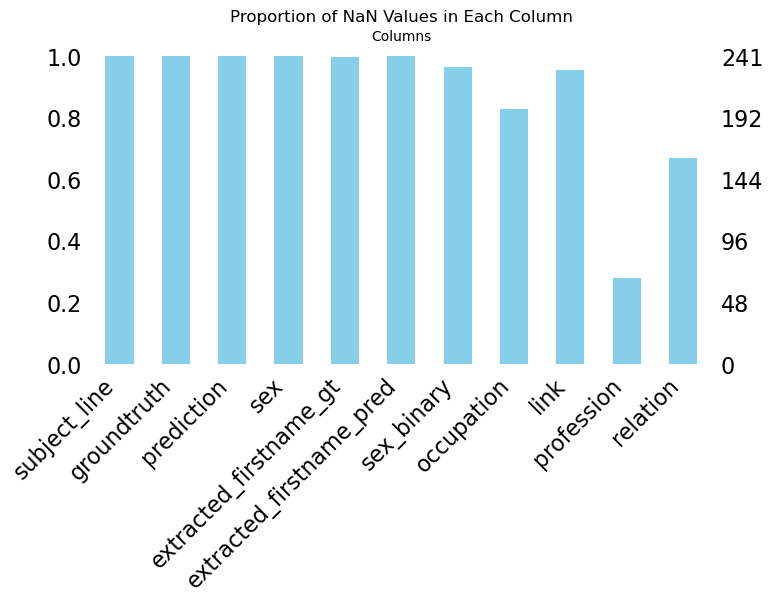

In [43]:
import missingno as msno
import matplotlib.pyplot as plt

# Calculate the proportion of NaN values in each column
nan_proportion = df_transcriptions.isnull().mean()

# Plot the proportion of NaN values
plt.figure(figsize=(10, 6))
nan_plot = msno.bar(df_transcriptions, color='skyblue', figsize=(8, 4))
plt.title('Proportion of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of NaN Values')
plt.xticks(rotation=90)
plt.gca().set_xticklabels([]) 
#plt.gca().set_yticklabels([])  

plt.show()
